# Sonar Project

# Import and take a look at the data

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

In [104]:
# Load data

In [105]:
ds=pd.read_csv('Sonar.csv',header=0)

In [106]:
ds.head()

,0.02,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.018,0.0084,0.009,0.0032,R
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R


In [107]:
ds.shape

(207, 61)

In [108]:
ds.dtypes

0.02      float64
0.0371    float64
0.0428    float64
0.0207    float64
0.0954    float64
           ...   
0.018     float64
0.0084    float64
0.009     float64
0.0032    float64
R          object
Length: 61, dtype: object

In [109]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0.02    207 non-null    float64
 1   0.0371  207 non-null    float64
 2   0.0428  207 non-null    float64
 3   0.0207  207 non-null    float64
 4   0.0954  207 non-null    float64
 5   0.0986  207 non-null    float64
 6   0.1539  207 non-null    float64
 7   0.1601  207 non-null    float64
 8   0.3109  207 non-null    float64
 9   0.2111  207 non-null    float64
 10  0.1609  207 non-null    float64
 11  0.1582  207 non-null    float64
 12  0.2238  207 non-null    float64
 13  0.0645  207 non-null    float64
 14  0.066   207 non-null    float64
 15  0.2273  207 non-null    float64
 16  0.31    207 non-null    float64
 17  0.2999  207 non-null    float64
 18  0.5078  207 non-null    float64
 19  0.4797  207 non-null    float64
 20  0.5783  207 non-null    float64
 21  0.5071  207 non-null    float64
 22  0.

# Summary statistics

In [110]:
ds.describe()

,0.02,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.018,0.0084,0.009,0.0032
count,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,...,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000
mean,0.029208,0.038443,0.043837,0.054053,0.075105,0.104599,0.121591,0.134677,0.177361,0.208245,...,0.016034,0.013472,0.010729,0.010917,0.009300,0.008181,0.007771,0.007947,0.007936,0.006523
std,0.023038,0.033040,0.038521,0.046583,0.055669,0.059247,0.061897,0.085340,0.118311,0.134741,...,0.012027,0.009628,0.007071,0.007310,0.007103,0.005719,0.005756,0.006485,0.006196,0.005038
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013300,0.016400,0.018900,0.024450,0.037700,0.066950,0.080600,0.080350,0.096750,0.111150,...,0.008350,0.007350,0.005050,0.005350,0.004100,0.004400,0.003700,0.003600,0.003650,0.003100
50%,0.022800,0.030800,0.034200,0.044100,0.062000,0.092100,0.105600,0.111900,0.152200,0.181000,...,0.013800,0.011500,0.009600,0.009300,0.007500,0.006800,0.005900,0.005800,0.006300,0.005300
75%,0.035800,0.048100,0.058200,0.065700,0.101050,0.134150,0.153050,0.169800,0.231500,0.269000,...,0.020700,0.016750,0.014900,0.014450,0.012100,0.010350,0.010350,0.010400,0.010350,0.008550
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


Observations:

# Check null values

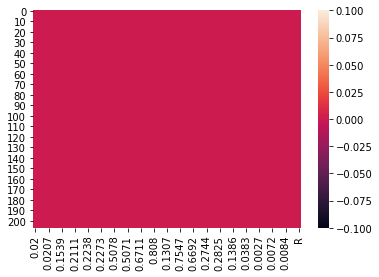

In [111]:
sns.heatmap(ds.isnull())

Observation: No missing data

# Checking correlation

In [112]:
dscor=ds.corr()
dscor

,0.02,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.018,0.0084,0.009,0.0032
0.02,1.000000,0.736104,0.571706,0.490853,0.345744,0.238824,0.262095,0.356312,0.356822,0.318440,...,0.255916,0.354348,0.310964,0.324101,0.311683,0.224784,0.319663,0.368413,0.357611,0.346302
0.0371,0.736104,1.000000,0.779915,0.607297,0.419877,0.332319,0.279328,0.334747,0.317929,0.270787,...,0.320931,0.435641,0.346259,0.384526,0.380188,0.263959,0.282822,0.353061,0.352260,0.359010
0.0428,0.571706,0.779915,1.000000,0.782662,0.546365,0.346271,0.190628,0.237974,0.253615,0.219641,...,0.238392,0.395121,0.333124,0.367687,0.289754,0.289393,0.383945,0.334122,0.425100,0.374256
0.0207,0.490853,0.607297,0.782662,1.000000,0.729338,0.352901,0.248713,0.248131,0.252048,0.238136,...,0.177103,0.372377,0.363470,0.337358,0.284345,0.287941,0.349411,0.345537,0.421410,0.399262
0.0954,0.345744,0.419877,0.546365,0.729338,1.000000,0.597438,0.334831,0.203590,0.176522,0.183240,...,0.115023,0.269478,0.316412,0.204402,0.197098,0.197829,0.218004,0.238749,0.290793,0.255220
0.0986,0.238824,0.332319,0.346271,0.352901,0.597438,1.000000,0.703624,0.471942,0.329145,0.288639,...,0.172210,0.252509,0.162255,0.164595,0.133351,0.168382,0.163433,0.204027,0.220678,0.178027
0.1539,0.262095,0.279328,0.190628,0.248713,0.334831,0.703624,1.000000,0.675612,0.469490,0.425675,...,0.182929,0.147402,0.047982,0.161645,0.196456,0.171433,0.183382,0.242632,0.183279,0.224536
0.1601,0.356312,0.334747,0.237974,0.248131,0.203590,0.471942,0.675612,1.000000,0.779512,0.652635,...,0.260114,0.221356,0.103418,0.233340,0.240079,0.276214,0.266743,0.287568,0.194209,0.147350
0.3109,0.356822,0.317929,0.253615,0.252048,0.176522,0.329145,0.469490,0.779512,1.000000,0.879711,...,0.172312,0.215365,0.109029,0.199749,0.181543,0.226605,0.186347,0.232078,0.096662,0.099233
0.2111,0.318440,0.270787,0.219641,0.238136,0.183240,0.288639,0.425675,0.652635,0.879711,1.000000,...,0.167179,0.166151,0.097689,0.146820,0.175322,0.152548,0.141211,0.212272,0.058260,0.097528


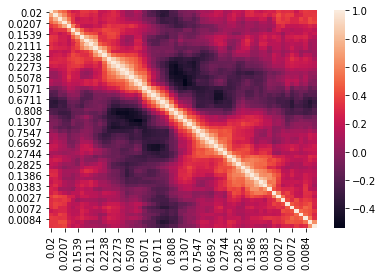

In [113]:
sns.heatmap(dscor)

Observations: The lighter the block the greater the correlation.

# Encode categorical data to numerical data with LabelEncoder

In [114]:
# Change categorical data to numerical data for the target column

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

ds['R'] = le.fit_transform(ds['R'])

In [115]:
ds.head()

,0.02,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.018,0.0084,0.009,0.0032,R
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,1
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,1
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,1
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,1
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,1


PCA?

# Check and remove outliers and skewness

In [116]:
ds.shape

(207, 61)

In [117]:
ds.skew()

0.02      2.122983
0.0371    2.149965
0.0428    2.645849
0.0207    3.397590
0.0954    2.020369
            ...   
0.018     1.685823
0.0084    2.094443
0.009     1.736231
0.0032    2.769687
R         0.146372
Length: 61, dtype: float64

In [118]:
#Treating using log
for col in ds.columns:
    if ds.skew().loc[col]>0.55:
        ds[col]=np.log1p(ds[col])

In [119]:
ds.skew()

0.02      2.028012
0.0371    1.964872
0.0428    2.339008
0.0207    2.814288
0.0954    1.702199
            ...   
0.018     1.661447
0.0084    2.054475
0.009     1.712198
0.0032    2.705349
R         0.146372
Length: 61, dtype: float64

Observation: Log functin was not very successful

In [120]:
from scipy.stats import zscore
z_score=abs(zscore(ds))
print(ds.shape)
ds_fin=ds.loc[(z_score<3).all(axis=1)]
print(ds_fin.shape)

(207, 61)
(172, 61)


# Split data into input and target

In [121]:
# Lineup target and input values
ds_x=ds.drop(columns=['R'])
y=ds[['R']]

In [122]:
#Scaling for logistic regression
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
ds_x=sc.fit_transform(ds_x)
ds_x=pd.DataFrame(ds_x,columns=ds_x.columns)

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [ ]:
# Apply PCA to reduce the amount of input columns
from sklearn.decomposition import PCA
pca=PCA(n_components=10) #pca=PCA(25)
x=pca.fit_transform(ds_x)

In [ ]:
x=pca.fit_transform(ds_x)

In [ ]:
x.head()

In [ ]:
from sklearn.model_selection import train_test_split,cross_val_score
# Train test split
x_train,x_test, y_train, y_test = train_test_split(x,y, random_state=55, test_size=0.20)

# Using GridSearchCV to select the best parameter

In [ ]:
# best parameters for logistic regression

from sklearn.model_selection import GridSearchCV
lg=LogisticRegression()
parameters={'penalty:['l1','l2']}
gd=GridSearchCV(lg,parameters)
gd.fit(x_train,y_train)
gd.best_params_

In [ ]:
# Best parameters for SVC

sv=SVC()
parameters={‘kernel’:(‘linear’,’rbf’),’c’:[1:10]}
gd=GridSearchCV(sv,parameters)
gd.fit(x_train,y_train)
gd.best_params_

In [ ]:
# Best parameters for DecisionTree

dt=DecisionTreeClassifier()
parameters={‘criterion’:(‘gini’,’entropy’)}
gd=GridSearchCV(dt,parameters)
gd.fit(x_train,y_train)
gd.best_params_


In [ ]:
KNN?

# Logistic Regression and binary classification methods

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,auc

In [138]:
KNN=KNeighborsClassifier()
SV=SVC()
LR=LogisticRegression()
DT=DecisionTreeClassifier(random_state=6)
GNB=GaussianNB()


In [141]:
models=[]
models.append(('KneighborsClassifier',KNN))
models.append(('SVC',SV))
models.append(('LogisticRegression()',LR))
models.append(('DecisionTreeClassifier',DT))
models.append(('GausianNB', GNB))

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve,auc

In [148]:
Model=[]
score=[]
cvs=[]
rocscore=[]

for model in models:
    print('*************************',model,'*************************')
    print('\n')
    model.append(model)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy score =',AS)
    score.append(AS*100)
    print('\n')
    sc=Cross_val_score(model,x,y, cv=10,scoring='accuracy'.mean())
    print('Cross validation score =',sc)
    cvs.append(sc*100)
    print('\n')
    false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,pre)
    roc_auc=auc(false_positive_rate,true_positive_rate)
    print('roc_auc_score = ', roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('classification_report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate,true_positive_rate, label='AUC= %0.2f'%roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True positive rate')
    plt.xlabel('False positive rate')
    print('\n\n')


************************* ('KneighborsClassifier', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')) *************************




AttributeError: 'tuple' object has no attribute 'append'

In [ ]:
# Loop to run all classification models
model=[LogisticRegression(),GaussianNB(),SVC(kernel='rbf'),SVC(kernel='poly'),DecisionTreeClassifier()]

for m in model:    
    print('*************************',m,'*************************')
    print('\n')
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,predm)
    roc_auc=auc(false_positive_rate,true_positive_rate)
    sc=cross_val_score(m, x_train, y_train, cv=5)
   
                       
    print('Accuracy score of ',m,'is:')                                                         
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('roc_auc_score = ', roc_auc)
    print('cross validation score = ',sc)                   
    print('\n')                                 

In [93]:
# Loop to run all classification models
model=[LogisticRegression(),GaussianNB(),SVC(kernel='rbf'),SVC(kernel='poly'),DecisionTreeClassifier()]

for m in model:    
    print('*************************',m,'*************************')
    print('\n')
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,predm)
    roc_auc=auc(false_positive_rate,true_positive_rate)
    sc=cross_val_score(m, x_train, y_train, cv=5)
   
                       
    print('Accuracy score of ',m,'is:')                                                         
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('roc_auc_score = ', roc_auc)
    print('cross validation score = ',sc)                   
    print('\n')                                 

************************* LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) *************************


Accuracy score of  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) is:
0.8333333333333334
[[25  2]
 [ 5 10]]
              precision    recall  f1-score   support

           0       0.83      0.93      0.88        27
           1       0.83      0.67      0.74        15

    accuracy                           0.83        42
   macro avg   

In [92]:
result=pd.DataFrame({'Model': model, 'Accuracy_score':accuracy_score, 'Confusion_matrix':confusion_matrix,'Cross_val_score':sc,'Roc_auc_score': roc_auc})
result

,Model,Accuracy_score,Confusion_matrix,Cross_val_score,Roc_auc_score
0,"LogisticRegression(C=1.0, class_weight=None, d...",<function accuracy_score at 0x000002B36B683C18>,<function confusion_matrix at 0x000002B36B683CA8>,0.818182,0.796296
1,"GaussianNB(priors=None, var_smoothing=1e-09)",<function accuracy_score at 0x000002B36B683C18>,<function confusion_matrix at 0x000002B36B683CA8>,0.757576,0.796296
2,"SVC(C=1.0, break_ties=False, cache_size=200, c...",<function accuracy_score at 0x000002B36B683C18>,<function confusion_matrix at 0x000002B36B683CA8>,0.818182,0.796296
3,"SVC(C=1.0, break_ties=False, cache_size=200, c...",<function accuracy_score at 0x000002B36B683C18>,<function confusion_matrix at 0x000002B36B683CA8>,0.696970,0.796296
4,"DecisionTreeClassifier(ccp_alpha=0.0, class_we...",<function accuracy_score at 0x000002B36B683C18>,<function confusion_matrix at 0x000002B36B683CA8>,0.848485,0.796296


In [ ]:
I choose the SVC 'rbf' model because it gives the best scores.